# EDA

# Predicting Stock Market Performance Based on Speeches by The Fed

## Table of Contents

1. Import Packages, Modules, Data
2. Text Sentiment Analysis
3. Comparative Analysis: Stock Data Surrounding Speeches

## 1. Import Packages, Modules, Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import timedelta

In [3]:
#nltk.download('vader_lexicon')

In [4]:
#master_df = pd.read_csv('data_intermediate/master_df.csv')
#sp_clean_df = pd.read_csv('data_intermediate/sp500_cleaned.csv')

In [5]:
master_df = pd.read_pickle('data_intermediate/master_df.pkl')
sp_clean_df = pd.read_pickle('data_intermediate/sp500_cleaned.pkl')

In [6]:
print(master_df.head(2), '\n\n')
print(sp_clean_df.head(2))

                                                txt_tokenized        price  \
date                                                                         
2022-06-17  [for, release, on, delivery, 845, am, edt, jun...  3674.840088   
2022-09-28  [for, release, on, delivery, 1015, am, edt, 91...  3719.040039   

                   open         high          low  daily_return  daily_span  
date                                                                         
2022-06-17  3665.899902  3707.709961  3636.870117          0.22   70.839844  
2022-09-28  3651.939941  3736.739990  3640.610107          1.97   96.129883   


                  Price         Open         High          Low  Change %  \
Date                                                                       
2023-10-25  4201.149902  4230.040039  4230.040039  4196.250000     -1.10   
2023-10-24  4247.680176  4235.790039  4259.379883  4219.430176      0.73   

            daily_span  
Date                    
2023-10-25   33.7

## 2. Text Sentiment Analysis

#### Perform Sentiment Analysis with VADER

Define a function that takes an input string of tokenized text and outputs a VADER sentiment score.
- VADER = Valence Aware Dictionary and sEntiment Reasoner.

In [7]:
#function to use VADER
def analyze_sentiment_vader(text_tok):
    sid = SentimentIntensityAnalyzer()
    text = ' '.join(text_tok)
    sentiment_scores = sid.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score


Apply the analyze_sentiment_vader() to master_df text to determine the overall sentiment of each speech, as well as the sentiment of the first, middle and last 1/3 of the speech.

In [8]:
master_df['vader_sent_overall'] = master_df['txt_tokenized'].apply(analyze_sentiment_vader)

# Split the text into thirds and calculate sentiment for each segment
master_df['begin_sent'] = master_df.apply(lambda row: analyze_sentiment_vader(row['txt_tokenized'][:len(row['txt_tokenized'])//3]), axis=1)
master_df['mid_sent'] = master_df.apply(lambda row: analyze_sentiment_vader(row['txt_tokenized'][len(row['txt_tokenized'])//3:2*len(row['txt_tokenized'])//3]), axis=1)
master_df['end_sent'] = master_df.apply(lambda row: analyze_sentiment_vader(row['txt_tokenized'][2*len(row['txt_tokenized'])//3:]), axis=1)

In [9]:
master_df.head()

,txt_tokenized,price,open,high,low,daily_return,daily_span,vader_sent_overall,begin_sent,mid_sent,end_sent
date,,,,,,,,,,,
2022-06-17,"[for, release, on, delivery, 845, am, edt, jun...",3674.840088,3665.899902,3707.709961,3636.870117,0.22,70.839844,0.9962,0.9896,0.9729,0.9858
2022-09-28,"[for, release, on, delivery, 1015, am, edt, 91...",3719.040039,3651.939941,3736.739990,3640.610107,1.97,96.129883,0.9887,0.9336,0.1027,0.9686
2023-09-28,"[for, release, on, delivery, 400, pm, edt, sep...",4299.700195,4269.649902,4317.270020,4264.379883,0.59,52.890137,0.9955,0.9290,0.9796,0.9895
2020-05-21,"[for, release, on, delivery, 230, pm, edt, may...",2948.510010,2969.949951,2978.500000,2938.570068,-0.78,39.929932,0.9912,0.9325,0.9436,0.9789
2020-04-09,"[for, release, on, delivery, 1000, am, edt, ap...",2789.820068,2776.989990,2818.570068,2762.360107,1.45,56.209961,0.9988,0.9265,0.9849,0.9930


In [10]:
sp_clean_df.head()

,Price,Open,High,Low,Change %,daily_span
Date,,,,,,
2023-10-25,4201.149902,4230.040039,4230.040039,4196.250000,-1.10,33.790039
2023-10-24,4247.680176,4235.790039,4259.379883,4219.430176,0.73,39.949707
2023-10-23,4217.040039,4210.399902,4255.839844,4189.220215,-0.17,66.619629
2023-10-20,4224.160156,4273.850098,4276.560059,4223.029785,-1.26,53.530273
2023-10-19,4278.000000,4321.359863,4339.540039,4269.689941,-0.85,69.850098


# 3. Comparative Analysis: Stock Data Surrounding Speeches

Join df's into one combined_df that holds ALL input data. This will be used to calculate trends in SP500 data surrounding speeches

In [11]:
combined_df = master_df.merge(sp_clean_df, how='right', left_index=True, right_index=True)
combined_df.drop(columns=['price','open', 'high', 'low', 'daily_return', 'daily_span_x'], inplace=True)
# Display the combined DataFrame
combined_df.head()

,txt_tokenized,vader_sent_overall,begin_sent,mid_sent,end_sent,Price,Open,High,Low,Change %,daily_span_y
Date,,,,,,,,,,,
2023-10-25,NaN,NaN,NaN,NaN,NaN,4201.149902,4230.040039,4230.040039,4196.250000,-1.10,33.790039
2023-10-24,NaN,NaN,NaN,NaN,NaN,4247.680176,4235.790039,4259.379883,4219.430176,0.73,39.949707
2023-10-23,NaN,NaN,NaN,NaN,NaN,4217.040039,4210.399902,4255.839844,4189.220215,-0.17,66.619629
2023-10-20,NaN,NaN,NaN,NaN,NaN,4224.160156,4273.850098,4276.560059,4223.029785,-1.26,53.530273
2023-10-19,"[for, release, on, delivery, noon, edt, octobe...",0.9983,0.9931,0.9595,0.9104,4278.000000,4321.359863,4339.540039,4269.689941,-0.85,69.850098


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 961 entries, 2023-10-25 to 2020-01-02
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   txt_tokenized       26 non-null     object 
 1   vader_sent_overall  26 non-null     float64
 2   begin_sent          26 non-null     float64
 3   mid_sent            26 non-null     float64
 4   end_sent            26 non-null     float64
 5   Price               961 non-null    float32
 6   Open                961 non-null    float32
 7   High                961 non-null    float32
 8   Low                 961 non-null    float32
 9   Change %            961 non-null    float32
 10  daily_span_y        961 non-null    float32
dtypes: float32(6), float64(4), object(1)
memory usage: 99.9+ KB


#### create copy df to generate rolling averages of stock market stats surrounding speech dates.

- aggregate stats for ALL windows of 7ish days, then pull out the ones that are identified by a speech date

In [13]:
roll_df = combined_df.copy()
roll_df.head(1)

,txt_tokenized,vader_sent_overall,begin_sent,mid_sent,end_sent,Price,Open,High,Low,Change %,daily_span_y
Date,,,,,,,,,,,
2023-10-25,NaN,NaN,NaN,NaN,NaN,4201.149902,4230.040039,4230.040039,4196.25,-1.1,33.790039


In [14]:
roll_df['Change%_7d_roll_past'] = roll_df['Change %'].rolling(window=7).mean()
roll_df['daily_span_7d_roll_past'] = roll_df['daily_span_y'].rolling(window=7).mean()
roll_df['Price_roll_past'] = roll_df['Price'].rolling(window=7).mean()

In [15]:
#REVERSE DF ORDER TO COMPUTE FUTURE ROLLING AVS
roll_df = roll_df[::-1]

roll_df['Change%_7d_roll_future'] = roll_df['Change %'].rolling(window=7).mean()
roll_df['daily_span_7d_roll_future'] = roll_df['daily_span_y'].rolling(window=7).mean()
roll_df['Price_roll_future'] = roll_df['Price'].rolling(window=7).mean()

# Reverse the order back to the original
roll_df = roll_df[::-1]

In [16]:
roll_df.head(1)

,txt_tokenized,vader_sent_overall,begin_sent,mid_sent,end_sent,Price,Open,High,Low,Change %,daily_span_y,Change%_7d_roll_past,daily_span_7d_roll_past,Price_roll_past,Change%_7d_roll_future,daily_span_7d_roll_future,Price_roll_future
Date,,,,,,,,,,,,,,,,,
2023-10-25,NaN,NaN,NaN,NaN,NaN,4201.149902,4230.040039,4230.040039,4196.25,-1.1,33.790039,NaN,NaN,NaN,-0.571429,54.304269,4265.118652


#### Extract entries of roll_df that correspond to speech dates

In [17]:
speech_date_df = roll_df[roll_df['txt_tokenized'].notnull()]

In [18]:
speech_date_df.head(1)

,txt_tokenized,vader_sent_overall,begin_sent,mid_sent,end_sent,Price,Open,High,Low,Change %,daily_span_y,Change%_7d_roll_past,daily_span_7d_roll_past,Price_roll_past,Change%_7d_roll_future,daily_span_7d_roll_future,Price_roll_future
Date,,,,,,,,,,,,,,,,,
2023-10-19,"[for, release, on, delivery, noon, edt, octobe...",0.9983,0.9931,0.9595,0.9104,4278.0,4321.359863,4339.540039,4269.689941,-0.85,69.850098,NaN,NaN,NaN,-0.261429,55.150042,4341.967146


Visualize Market Volatility before and after speeches

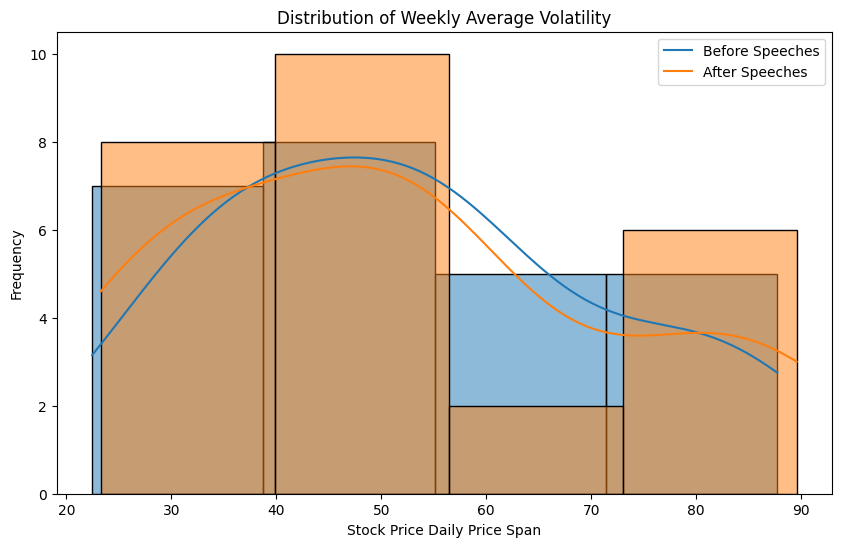

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(speech_date_df['daily_span_7d_roll_past'], bins=4, kde=True, alpha=0.5)
sns.histplot(speech_date_df['daily_span_7d_roll_future'], bins=4, kde=True, alpha=0.5)
plt.title('Distribution of Weekly Average Volatility')
plt.xlabel('Stock Price Daily Price Span')
plt.ylabel('Frequency')
plt.legend(['Before Speeches', 'After Speeches'])
plt.show()

In [20]:
# aggregate daily volitility numbers
mean_daily_span_7d_roll_past = speech_date_df['daily_span_7d_roll_past'].mean()
mean_daily_span_7d_roll_future = speech_date_df['daily_span_7d_roll_future'].mean()

#print
print('Avg daily volatility before each speech [1 wk avg]: ', mean_daily_span_7d_roll_past)
print('Avg daily volatility after each speech [1 wk avg]: ', mean_daily_span_7d_roll_future)
print('Avg daily volatility over entire time span: ', combined_df['daily_span_y'].mean(),'\n\n')

Avg daily volatility before each speech [1 wk avg]:  52.72463030133928
Avg daily volatility after each speech [1 wk avg]:  51.874777322287095
Avg daily volatility over entire time span:  53.22408 




In [21]:
# aggregate daily %change numbers (aka returns)
mean_daily_return_past = speech_date_df['Change%_7d_roll_past'].mean()
mean_daily_return_future = speech_date_df['Change%_7d_roll_future'].mean()

#print
print('Avg daily return before each speech [1 wk avg]: ', mean_daily_return_past)
print('Avg daily return after each speech [1 wk avg]: ', mean_daily_return_future)
print('Avg daily return over entire time span: ', combined_df['Change %'].mean(),'\n\n')

Avg daily return before each speech [1 wk avg]:  0.1150857153002705
Avg daily return after each speech [1 wk avg]:  0.030000002594193945
Avg daily return over entire time span:  0.03830385 




#### Calculate change in stock values week before and week after speeches, compare to speech day's price.

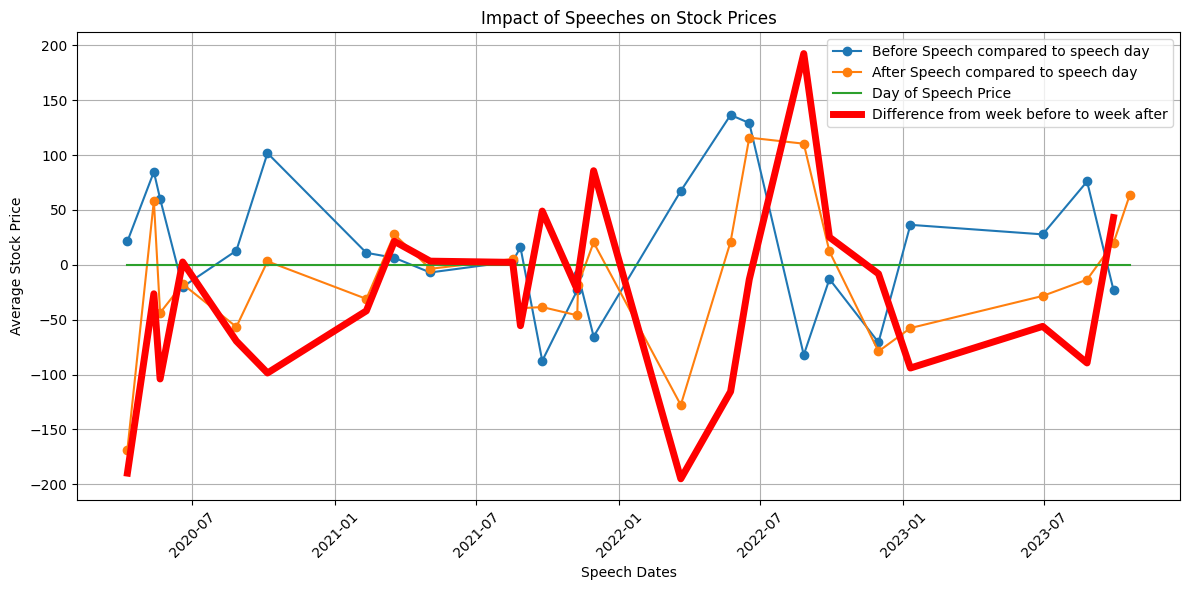

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

past = speech_date_df['Price_roll_past'] - speech_date_df['Price']
future = speech_date_df['Price_roll_future'] - speech_date_df['Price']

# Plot the weekly average stock prices before the speech
plt.plot(speech_date_df.index, past, label='Before Speech compared to speech day', marker='o')
plt.plot(speech_date_df.index, future, label='After Speech compared to speech day', marker='o')

# Plot the weekly average stock prices on the day of the speech
plt.plot(speech_date_df.index, future-future, label='Day of Speech Price')

#plot the change in average price from the week before to the week after
plt.plot(speech_date_df.index, future-past, label='Difference from week before to week after', linewidth=5, color='red')




# Add labels and legend
plt.xlabel('Speech Dates')
plt.ylabel('Average Stock Price')
plt.title('Impact of Speeches on Stock Prices')
plt.legend()

# Show the plot
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

In the above graph:
- The 'After' line position on a date represents the change in stock price from the day of the speech, to the average price of the following 7 days
- The 'Before' Line represents the change in stock price from the average of the preceding 7 days, to the day of the speech
- Red line is the change from week before to week after, so a positive value means the speech correlates with an increase in stock price

In [23]:
#create feature to measure change across each speech
speech_date_df['sp_chg_across_speech'] = speech_date_df['Price_roll_future'] - speech_date_df['Price_roll_past']

/var/folders/_w/xxwqncbj69xfsg6qtjh7f1640000gn/T/ipykernel_94761/1835776494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_date_df['sp_chg_across_speech'] = speech_date_df['Price_roll_future'] - speech_date_df['Price_roll_past']


In [24]:
speech_date_df.head(2)

,txt_tokenized,vader_sent_overall,begin_sent,mid_sent,end_sent,Price,Open,High,Low,Change %,daily_span_y,Change%_7d_roll_past,daily_span_7d_roll_past,Price_roll_past,Change%_7d_roll_future,daily_span_7d_roll_future,Price_roll_future,sp_chg_across_speech
Date,,,,,,,,,,,,,,,,,,
2023-10-19,"[for, release, on, delivery, noon, edt, octobe...",0.9983,0.9931,0.9595,0.9104,4278.000000,4321.359863,4339.540039,4269.689941,-0.85,69.850098,NaN,NaN,NaN,-0.261429,55.150042,4341.967146,NaN
2023-09-28,"[for, release, on, delivery, 400, pm, edt, sep...",0.9955,0.9290,0.9796,0.9895,4299.700195,4269.649902,4317.270020,4264.379883,0.59,52.890137,0.117143,58.577148,4276.575753,-0.467143,48.037040,4319.634277,43.058524


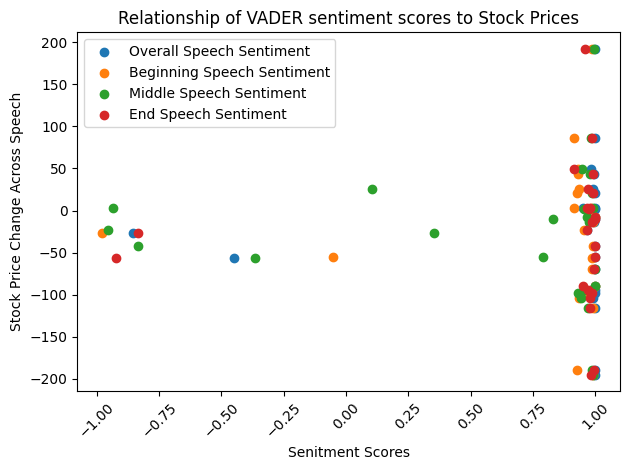

In [25]:
# plot to evaluate correlation betwen sentiment score and price change
plt.scatter(speech_date_df.vader_sent_overall, speech_date_df.sp_chg_across_speech)
plt.scatter(speech_date_df.begin_sent, speech_date_df.sp_chg_across_speech)
plt.scatter(speech_date_df.mid_sent, speech_date_df.sp_chg_across_speech)
plt.scatter(speech_date_df.end_sent, speech_date_df.sp_chg_across_speech)



# Add labels and legend
plt.xlabel('Senitment Scores')
plt.ylabel('Stock Price Change Across Speech')
plt.title('Relationship of VADER sentiment scores to Stock Prices')
plt.legend(['Overall Speech Sentiment', 'Beginning Speech Sentiment', 'Middle Speech Sentiment', 'End Speech Sentiment'])

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()

NLTK tutorial notes
- nltk.pos_tag(tokens) -> adds part of speech tags to each token
- 

Ideas
- write sliding window-ish function to pull all data from stonks following each of powells speeches to look at histograms, boxplots, etc. for totals after speeches vs entire time span aggregated